## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  49.038066   246.662571  0.170316   3.353527  0.667980
1  12.431427  1373.783303  0.178250   8.764890  1.517580
2  51.355192   458.155371  0.200422  10.098032  1.279046
3   9.115386   225.956981  0.633921   3.023388  1.603847
4  67.410569   987.574313  0.875528   2.627755  1.514562


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9078320	total: 58ms	remaining: 57.9s
1:	learn: 0.8998937	total: 58.5ms	remaining: 29.2s
2:	learn: 0.8914449	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8840403	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8741531	total: 60ms	remaining: 11.9s
5:	learn: 0.8663273	total: 60.5ms	remaining: 10s
6:	learn: 0.8583834	total: 60.9ms	remaining: 8.64s
7:	learn: 0.8487861	total: 61.3ms	remaining: 7.6s
8:	learn: 0.8396597	total: 61.7ms	remaining: 6.8s
9:	learn: 0.8319720	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8248884	total: 62.7ms	remaining: 5.63s
11:	learn: 0.8157378	total: 63ms	remaining: 5.19s
12:	learn: 0.8086499	total: 63.5ms	remaining: 4.82s
13:	learn: 0.7996608	total: 64ms	remaining: 4.51s
14:	learn: 0.7917886	total: 64.5ms	remaining: 4.24s
15:	learn: 0.7861282	total: 65.2ms	remaining: 4.01s
16:	learn: 0.7775104	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7722415	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7664237	total: 66.9ms	remaining: 3.45s
19:	l

100:	learn: 0.4082664	total: 104ms	remaining: 924ms
101:	learn: 0.4059801	total: 104ms	remaining: 919ms
102:	learn: 0.4026946	total: 105ms	remaining: 912ms
103:	learn: 0.3997549	total: 105ms	remaining: 907ms
104:	learn: 0.3973743	total: 106ms	remaining: 901ms
105:	learn: 0.3948888	total: 106ms	remaining: 896ms
106:	learn: 0.3927282	total: 107ms	remaining: 890ms
107:	learn: 0.3898614	total: 107ms	remaining: 884ms
108:	learn: 0.3870677	total: 107ms	remaining: 878ms
109:	learn: 0.3849208	total: 108ms	remaining: 873ms
110:	learn: 0.3820193	total: 108ms	remaining: 868ms
111:	learn: 0.3798920	total: 109ms	remaining: 862ms
112:	learn: 0.3773439	total: 109ms	remaining: 855ms
113:	learn: 0.3744803	total: 109ms	remaining: 849ms
114:	learn: 0.3722719	total: 110ms	remaining: 843ms
115:	learn: 0.3701399	total: 110ms	remaining: 838ms
116:	learn: 0.3672992	total: 110ms	remaining: 832ms
117:	learn: 0.3654431	total: 110ms	remaining: 826ms
118:	learn: 0.3635096	total: 111ms	remaining: 822ms
119:	learn: 

282:	learn: 0.1755970	total: 184ms	remaining: 467ms
283:	learn: 0.1750094	total: 185ms	remaining: 466ms
284:	learn: 0.1745567	total: 185ms	remaining: 465ms
285:	learn: 0.1741298	total: 186ms	remaining: 463ms
286:	learn: 0.1735695	total: 186ms	remaining: 462ms
287:	learn: 0.1730617	total: 187ms	remaining: 461ms
288:	learn: 0.1724641	total: 187ms	remaining: 461ms
289:	learn: 0.1718620	total: 188ms	remaining: 460ms
290:	learn: 0.1716486	total: 188ms	remaining: 459ms
291:	learn: 0.1711106	total: 189ms	remaining: 458ms
292:	learn: 0.1708892	total: 189ms	remaining: 457ms
293:	learn: 0.1703413	total: 190ms	remaining: 456ms
294:	learn: 0.1697810	total: 190ms	remaining: 455ms
295:	learn: 0.1690632	total: 191ms	remaining: 454ms
296:	learn: 0.1685660	total: 191ms	remaining: 452ms
297:	learn: 0.1683089	total: 192ms	remaining: 451ms
298:	learn: 0.1678894	total: 192ms	remaining: 450ms
299:	learn: 0.1673073	total: 192ms	remaining: 449ms
300:	learn: 0.1668831	total: 193ms	remaining: 448ms
301:	learn: 

502:	learn: 0.0764860	total: 284ms	remaining: 281ms
503:	learn: 0.0763533	total: 285ms	remaining: 280ms
504:	learn: 0.0760599	total: 285ms	remaining: 279ms
505:	learn: 0.0758846	total: 286ms	remaining: 279ms
506:	learn: 0.0755980	total: 286ms	remaining: 278ms
507:	learn: 0.0754005	total: 287ms	remaining: 278ms
508:	learn: 0.0751077	total: 287ms	remaining: 277ms
509:	learn: 0.0749379	total: 288ms	remaining: 277ms
510:	learn: 0.0745895	total: 290ms	remaining: 277ms
511:	learn: 0.0743153	total: 291ms	remaining: 277ms
512:	learn: 0.0740473	total: 293ms	remaining: 278ms
513:	learn: 0.0738738	total: 301ms	remaining: 285ms
514:	learn: 0.0736363	total: 301ms	remaining: 284ms
515:	learn: 0.0734037	total: 302ms	remaining: 283ms
516:	learn: 0.0730688	total: 302ms	remaining: 282ms
517:	learn: 0.0728398	total: 303ms	remaining: 282ms
518:	learn: 0.0725820	total: 303ms	remaining: 281ms
519:	learn: 0.0723301	total: 303ms	remaining: 280ms
520:	learn: 0.0720839	total: 316ms	remaining: 291ms
521:	learn: 

622:	learn: 0.0526878	total: 363ms	remaining: 220ms
623:	learn: 0.0524415	total: 364ms	remaining: 219ms
624:	learn: 0.0522805	total: 364ms	remaining: 218ms
625:	learn: 0.0521222	total: 364ms	remaining: 218ms
626:	learn: 0.0519665	total: 364ms	remaining: 217ms
627:	learn: 0.0518890	total: 365ms	remaining: 216ms
628:	learn: 0.0517347	total: 366ms	remaining: 216ms
629:	learn: 0.0515816	total: 366ms	remaining: 215ms
630:	learn: 0.0514349	total: 367ms	remaining: 215ms
631:	learn: 0.0512247	total: 367ms	remaining: 214ms
632:	learn: 0.0511495	total: 367ms	remaining: 213ms
633:	learn: 0.0510752	total: 369ms	remaining: 213ms
634:	learn: 0.0509295	total: 370ms	remaining: 213ms
635:	learn: 0.0508565	total: 371ms	remaining: 212ms
636:	learn: 0.0507155	total: 372ms	remaining: 212ms
637:	learn: 0.0505091	total: 372ms	remaining: 211ms
638:	learn: 0.0504372	total: 373ms	remaining: 211ms
639:	learn: 0.0503662	total: 374ms	remaining: 210ms
640:	learn: 0.0502222	total: 377ms	remaining: 211ms
641:	learn: 

820:	learn: 0.0300896	total: 457ms	remaining: 99.7ms
821:	learn: 0.0299766	total: 458ms	remaining: 99.1ms
822:	learn: 0.0298671	total: 458ms	remaining: 98.5ms
823:	learn: 0.0297534	total: 459ms	remaining: 98ms
824:	learn: 0.0296460	total: 459ms	remaining: 97.4ms
825:	learn: 0.0295361	total: 460ms	remaining: 96.8ms
826:	learn: 0.0294046	total: 460ms	remaining: 96.3ms
827:	learn: 0.0293468	total: 462ms	remaining: 95.9ms
828:	learn: 0.0292428	total: 463ms	remaining: 95.4ms
829:	learn: 0.0292062	total: 463ms	remaining: 94.9ms
830:	learn: 0.0291503	total: 464ms	remaining: 94.3ms
831:	learn: 0.0290481	total: 464ms	remaining: 93.7ms
832:	learn: 0.0289463	total: 465ms	remaining: 93.2ms
833:	learn: 0.0288361	total: 465ms	remaining: 92.6ms
834:	learn: 0.0287335	total: 466ms	remaining: 92.1ms
835:	learn: 0.0286078	total: 466ms	remaining: 91.5ms
836:	learn: 0.0285404	total: 467ms	remaining: 90.9ms
837:	learn: 0.0284327	total: 467ms	remaining: 90.3ms
838:	learn: 0.0284030	total: 468ms	remaining: 89

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

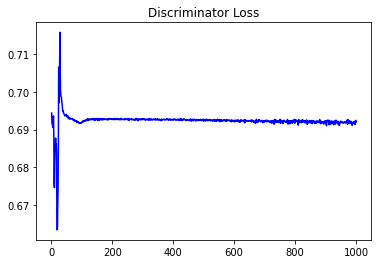

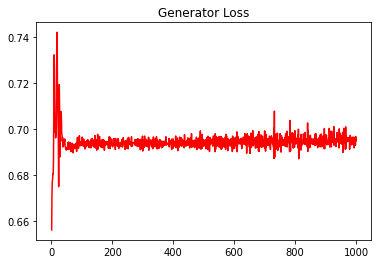

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4911181179730198


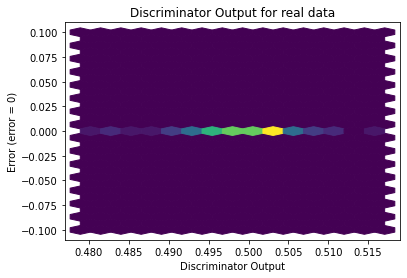

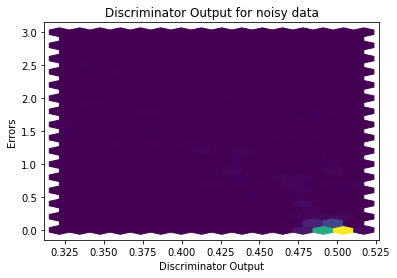

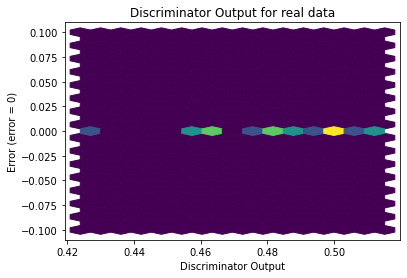

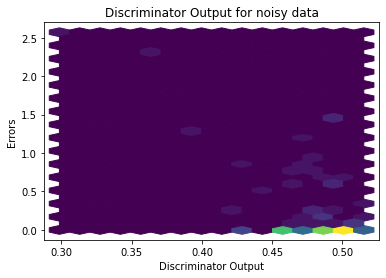

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


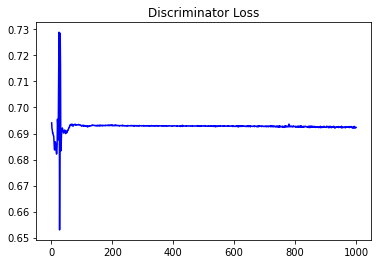

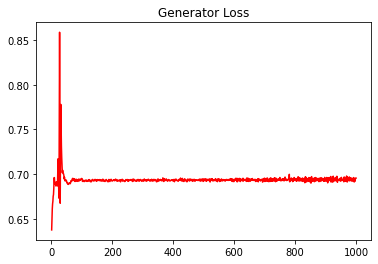

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4435290951117735


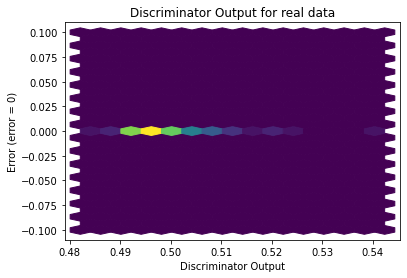

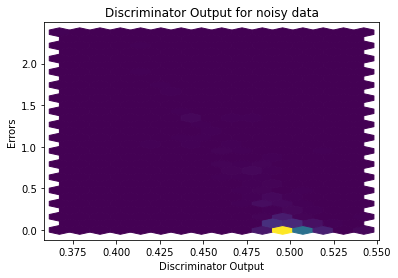

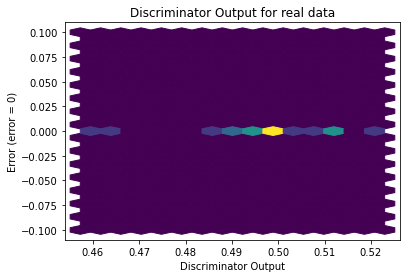

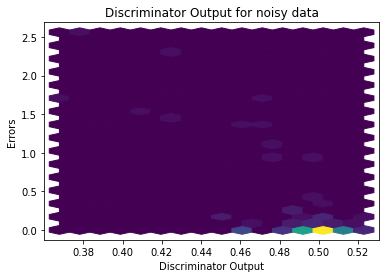

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5338]], requires_grad=True)
